In [2]:
#differentiation
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
f = x**3 + 2*x**2 + 3*x + 4

# Differentiate the function
f_prime = sp.diff(f, x)
f_prime

3*x**2 + 4*x + 3

In [3]:
#numerical integgration
import scipy.integrate as spi

# Define the function to integrate
def f(x):
    return x**3 + 2*x**2 + 3*x + 4

# Perform the numerical integration
result, error = spi.quad(f, 0, 1)
result

6.416666666666667

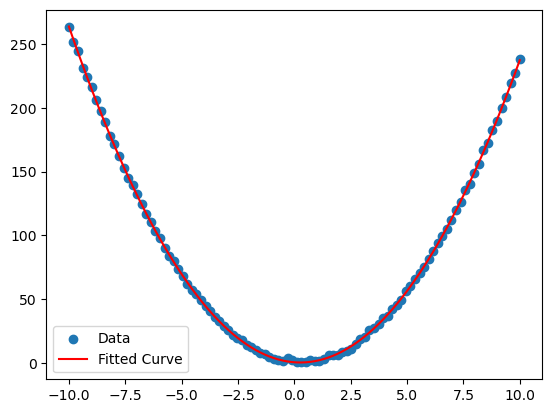

In [4]:
#
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Define the model function to fit
def model_func(x, a, b, c):
    return a * x**2 + b * x + c

# Generate some data points
x_data = np.linspace(-10, 10, 100)
y_data = model_func(x_data, 2.5, -1.3, 0.5) + np.random.normal(size=x_data.size)

# Fit the model to the data
popt, pcov = opt.curve_fit(model_func, x_data, y_data)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model_func(x_data, *popt), label='Fitted Curve', color='red')
plt.legend()
plt.show()

In [5]:
#linear reggression
from sklearn.linear_model import LinearRegression

# Generate some data points
x_data = np.random.rand(100, 1) * 10
y_data = 2 * x_data + 1 + np.random.normal(size=x_data.shape)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_data, y_data)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(array([1.99416637]), array([1.02321655]))

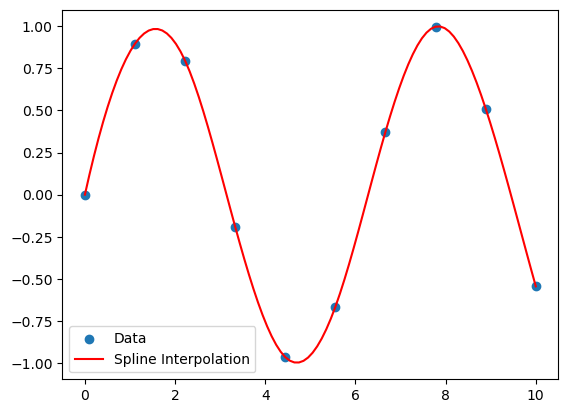

In [6]:
#spline interpollation
import scipy.interpolate as spi

# Generate some data points
x_data = np.linspace(0, 10, 10)
y_data = np.sin(x_data)

# Create a spline interpolation
spline = spi.InterpolatedUnivariateSpline(x_data, y_data)

# Generate new x values and interpolate the y values
x_new = np.linspace(0, 10, 100)
y_new = spline(x_new)

# Plot the data points and the interpolated curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_new, y_new, label='Spline Interpolation', color='red')
plt.legend()
plt.show()

The interpolated y value at x=4.0 is y=7.111111111111111


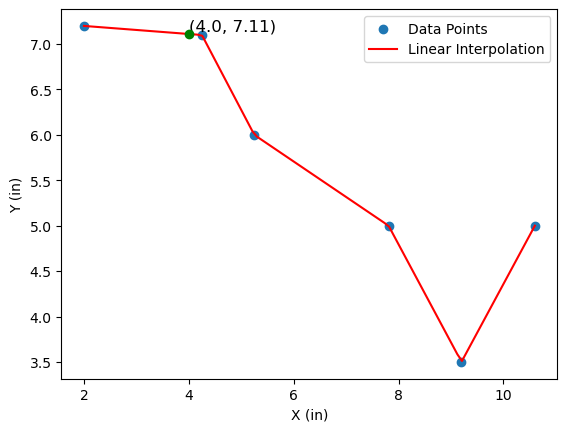

In [7]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt

# Given data points
x_data = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y_data = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

# Create a linear interpolation function
linear_interp = spi.interp1d(x_data, y_data, kind='linear')

# Find the interpolated y value at x=4.0
x_new = 4.0
y_new = linear_interp(x_new)

print(f'The interpolated y value at x={x_new} is y={y_new}')

# Plot the data points and the linear interpolation
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = linear_interp(x_plot)

plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_plot, y_plot, label='Linear Interpolation', color='red')
plt.scatter(x_new, y_new, color='green', zorder=5)  # Highlight the interpolated point
plt.text(x_new, y_new, f'({x_new}, {y_new:.2f})', fontsize=12, verticalalignment='bottom')
plt.xlabel('X (in)')
plt.ylabel('Y (in)')
plt.legend()
plt.show()

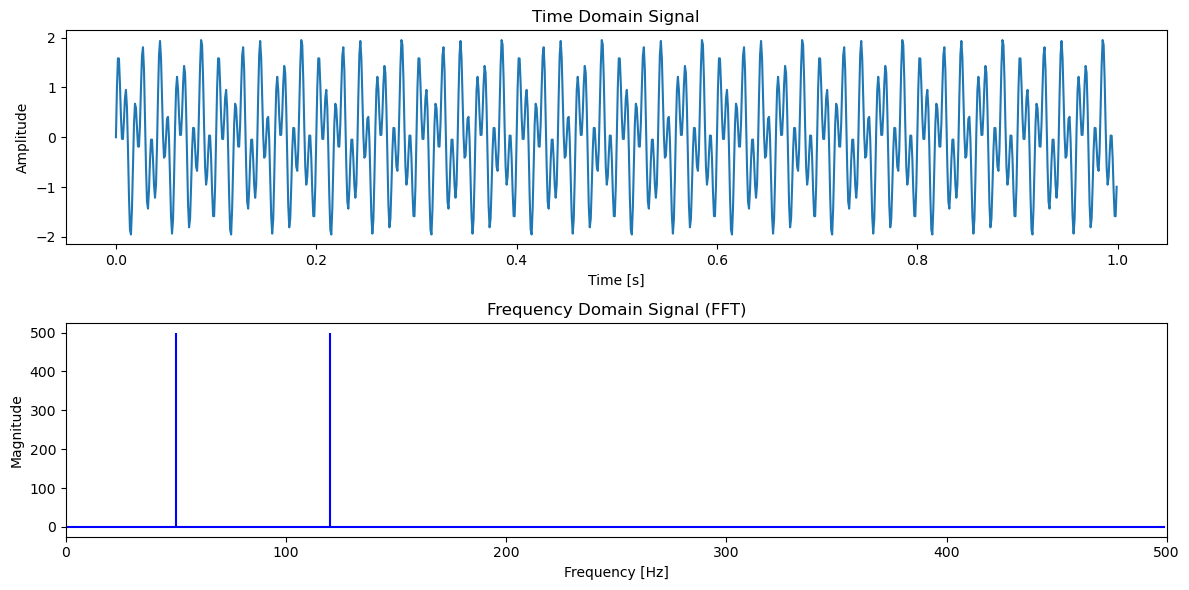

In [8]:
#FFT
def compute_fft():
    # Parameters
    f1 = 50   # frequency 1
    f2 = 120  # frequency 2
    Fs = 1000 # sampling frequency
    T = 1     # duration in seconds

    # Time vector
    t = np.linspace(0, T, int(Fs*T), endpoint=False)

    # Signal
    s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

    # Compute FFT
    N = len(s)
    fft_s = np.fft.fft(s)
    fft_s = fft_s[:N//2]  # Take the positive frequency part
    freqs = np.fft.fftfreq(N, 1/Fs)[:N//2]

    # Plot the signal
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, s)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")

    # Plot the magnitude spectrum
    plt.subplot(2, 1, 2)
    plt.stem(freqs, np.abs(fft_s), 'b', markerfmt=" ", basefmt="-b")
    plt.title("Frequency Domain Signal (FFT)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(0, 500)  # Display up to half the sampling rate

    plt.tight_layout()
    plt.show()

# Call the function to compute FFT and plot the results
compute_fft()

In [9]:
#trapezoidal rule
# Define the function to integrate
def f(x):
    return x**3 + 2*x**2 + 3*x + 4

# Implement the trapezoidal rule
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

# Parameters
a = 0  # Start of the interval
b = 1  # End of the interval
n = 100  # Number of sub-intervals

# Calculate the integral using the trapezoidal rule
integral = trapezoidal_rule(f, a, b, n)

print(f'The approximate value of the integral is {integral:.4f}')

# Optional: Compare with the exact integral using scipy.integrate.quad
import scipy.integrate as spi

exact_integral, _ = spi.quad(f, a, b)
print(f'The exact value of the integral is {exact_integral:.4f}')

The approximate value of the integral is 6.4167
The exact value of the integral is 6.4167


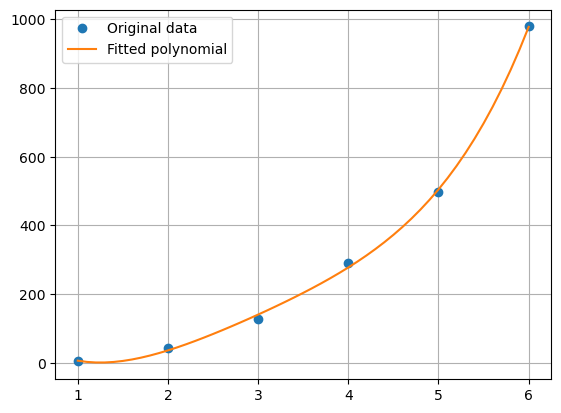

In [10]:
# Given data
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5.5, 43.1, 128, 290.7, 498.4, 978.67])

# Fit a 4th degree polynomial
p = np.polyfit(x, y, 4)

# Generate new x values for the fitted polynomial
x2 = np.arange(1, 6.1, 0.1)  # similar to MATLAB's 1:0.1:6

# Evaluate the polynomial at the new x values
y2 = np.polyval(p, x2)

# Plot the original data points and the polynomial fit
plt.plot(x, y, 'o', label='Original data')
plt.plot(x2, y2, label='Fitted polynomial')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

In [11]:
#question I
import numpy as np

# Function for Lagrange Interpolation
def lagrange_interpolation(x, y):
    def basis_polynomial(xi, xj, xk):
        p = np.poly1d([1])
        for x_m in xk:
            if x_m != xi:
                p *= np.poly1d([1, -x_m]) / (xi - x_m)
        return p

    n = len(x)
    L = [basis_polynomial(xi, x, x) for xi in x]
    P = np.poly1d([0])
    for i in range(n):
        P += y[i] * L[i]
    return P

# Function for Newton's Divided Difference
def newton_divided_diff(x, y):
    n = len(x)
    diff_table = np.zeros((n, n))
    diff_table[:,0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i + 1][j - 1] - diff_table[i][j - 1]) / (x[i + j] - x[i])
    
    coefficients = diff_table[0, :]
    return coefficients, diff_table

def newton_interpolation(coefficients, x_data, x):
    n = len(coefficients)
    p = np.poly1d(coefficients[-1])
    for k in range(1, n):
        p = np.poly1d(coefficients[-(k+1)]) + p * np.poly1d([1, -x_data[-(k)]])
    return p

# Given data points
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

# Compute Lagrange polynomial
P_lagrange = lagrange_interpolation(x, y)
lagrange_coefficients = P_lagrange.coefficients
print("Lagrange Polynomial Coefficients:", lagrange_coefficients)

# Compute Newton's Divided Difference coefficients
coefficients, diff_table = newton_divided_diff(x, y)
P_newton = newton_interpolation(coefficients, x, x)
newton_coefficients = P_newton.coefficients
print("Newton Polynomial Coefficients:", newton_coefficients)

# Analysis
analysis = """
3. Algorithm Analysis
Both Lagrange and Newton's methods will produce the same interpolating polynomial for a given set of data points. The main difference lies in their computational approach:

Lagrange Polynomial: The Lagrange interpolation formula directly constructs the polynomial using the basis polynomials. It is more straightforward but can be computationally intensive for a large number of points since it involves computing each basis polynomial separately.

Newton’s Divided Difference: Newton's method constructs the polynomial incrementally, which can be more efficient. It uses the concept of divided differences to build the polynomial, and it is easier to add additional points to an existing interpolation without recalculating the entire polynomial.
"""

print(analysis)

Lagrange Polynomial Coefficients: [-4.44089210e-16  1.00000000e+00 -3.55271368e-15  0.00000000e+00]
Newton Polynomial Coefficients: [ 1. -2.  1.]

3. Algorithm Analysis
Both Lagrange and Newton's methods will produce the same interpolating polynomial for a given set of data points. The main difference lies in their computational approach:

Lagrange Polynomial: The Lagrange interpolation formula directly constructs the polynomial using the basis polynomials. It is more straightforward but can be computationally intensive for a large number of points since it involves computing each basis polynomial separately.

Newton’s Divided Difference: Newton's method constructs the polynomial incrementally, which can be more efficient. It uses the concept of divided differences to build the polynomial, and it is easier to add additional points to an existing interpolation without recalculating the entire polynomial.



In [12]:
import numpy as np

# Power Iteration Method
def power_iteration(A, num_simulations: int):
    b_k = np.random.rand(A.shape[1])
    
    for _ in range(num_simulations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    eigenvector = b_k
    
    return eigenvalue, eigenvector

# QR Algorithm
def qr_algorithm(A, num_iterations: int):
    A_k = A.copy()
    
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A_k)
        A_k = np.dot(R, Q)
    
    eigenvalues = np.diag(A_k)
    
    return eigenvalues

# Matrix A
A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

# Compute eigenvalues and eigenvectors using Power Iteration
eigenvalue_power, eigenvector_power = power_iteration(A, 1000)

# Compute eigenvalues using QR Algorithm
eigenvalues_qr = qr_algorithm(A, 1000)

# Print results
print("Power Iteration Method:")
print("Eigenvalue:", eigenvalue_power)
print("Eigenvector:", eigenvector_power)

print("\nQR Algorithm:")
print("Eigenvalues:", eigenvalues_qr)

# Discussion
print("\nDiscussion:")
print("The Power Iteration method finds the largest eigenvalue and its corresponding eigenvector.")
print("The QR Algorithm provides all eigenvalues of the matrix.")
print("Comparing the largest eigenvalue from both methods:")
print("Largest eigenvalue from Power Iteration:", eigenvalue_power)
print("Largest eigenvalue from QR Algorithm:", max(eigenvalues_qr))

Power Iteration Method:
Eigenvalue: 4.6751308705666474
Eigenvector: [0.88765034 0.42713229 0.17214786]

QR Algorithm:
Eigenvalues: [4.67513087 3.53918887 0.78568026]

Discussion:
The Power Iteration method finds the largest eigenvalue and its corresponding eigenvector.
The QR Algorithm provides all eigenvalues of the matrix.
Comparing the largest eigenvalue from both methods:
Largest eigenvalue from Power Iteration: 4.6751308705666474
Largest eigenvalue from QR Algorithm: 4.67513087056665


Minimum point (x, y): (-0.3333333333333332, 0.3333333333333332)
Minimum value of the function: 0.6666666666666666
